PREDICTION DE FRAIS MEDICAUX

Importation des librairies


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Importation et lecture du fichier CSV


In [87]:
# Lecture du csv
df = pd.read_csv('insurance.csv')

# Afficher les premières lignes du DataFrame pour vérifier l'importation
display(df.head())
display(df.tail())

# Afficher des informations sur le DataFrame
df.info()

# Afficher les statistiques descriptives
df.describe()

# Valeurs manquantes du DataFrame
missing_values = df.isnull().sum()
missing_values

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Visualisations des données

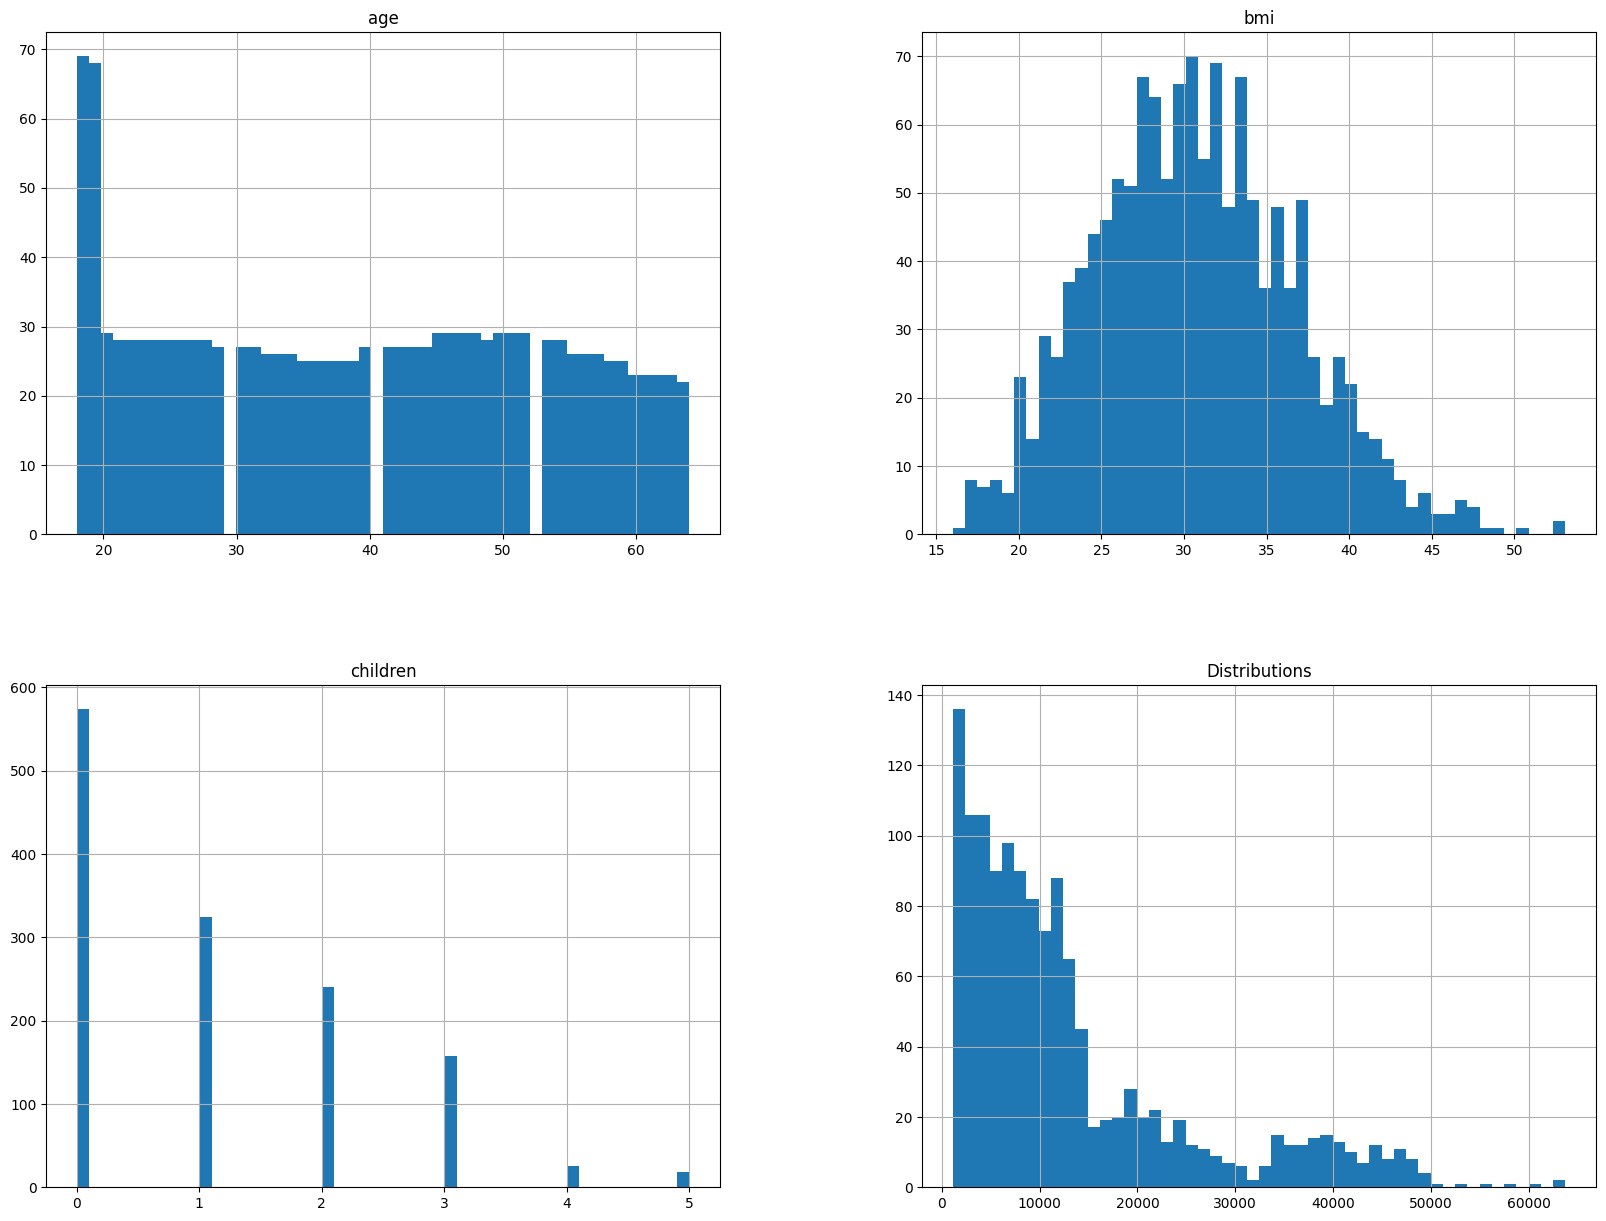

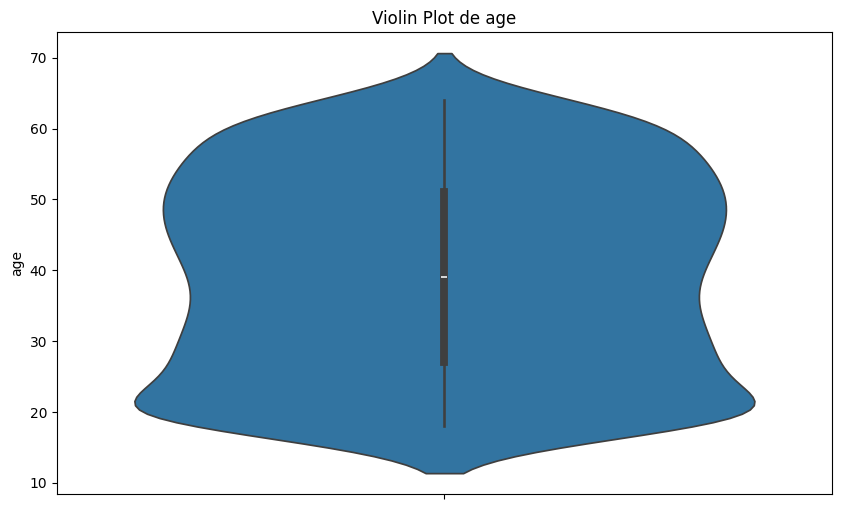

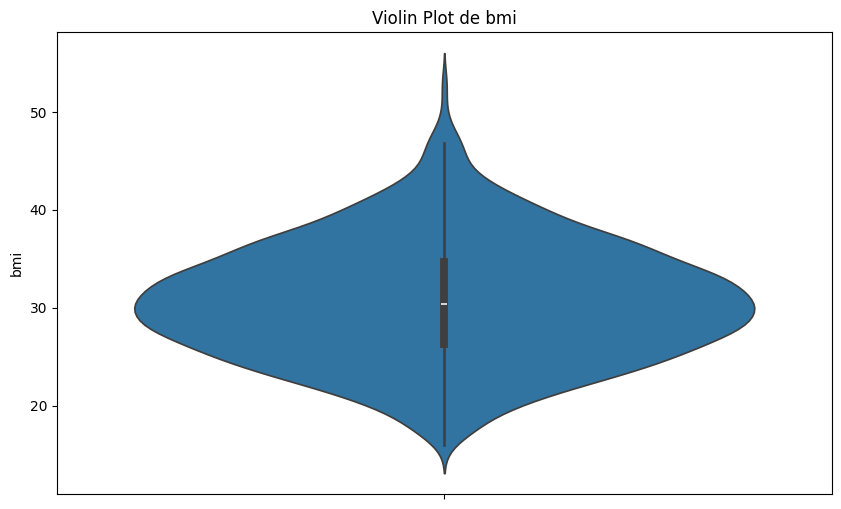

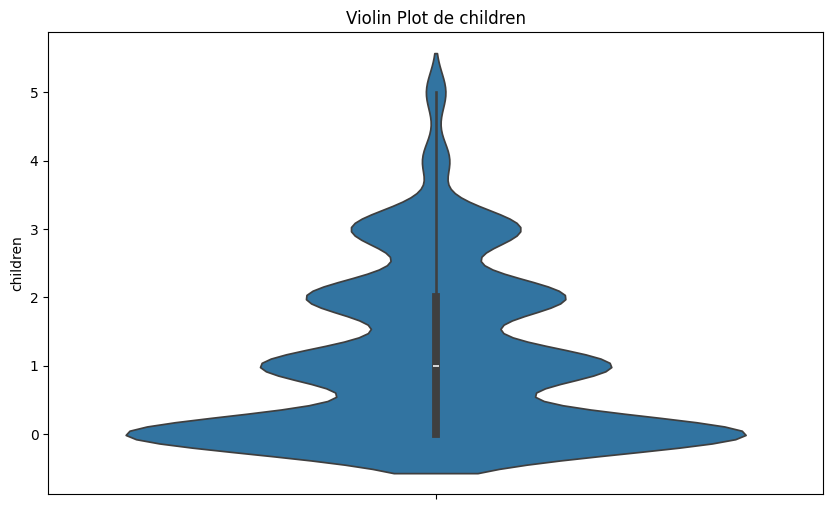

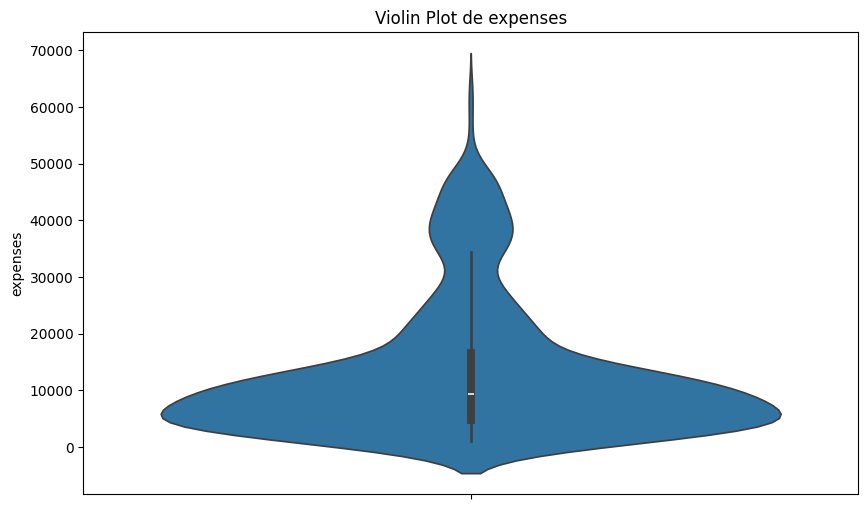

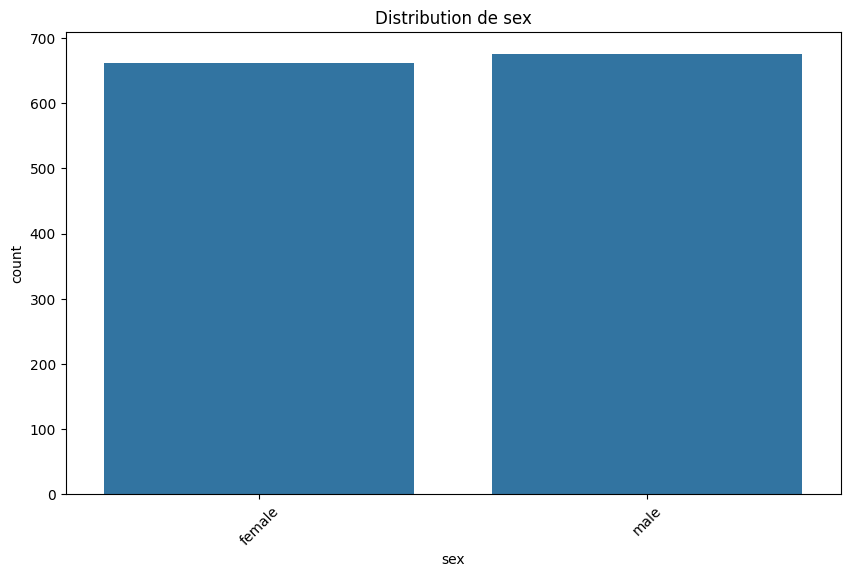

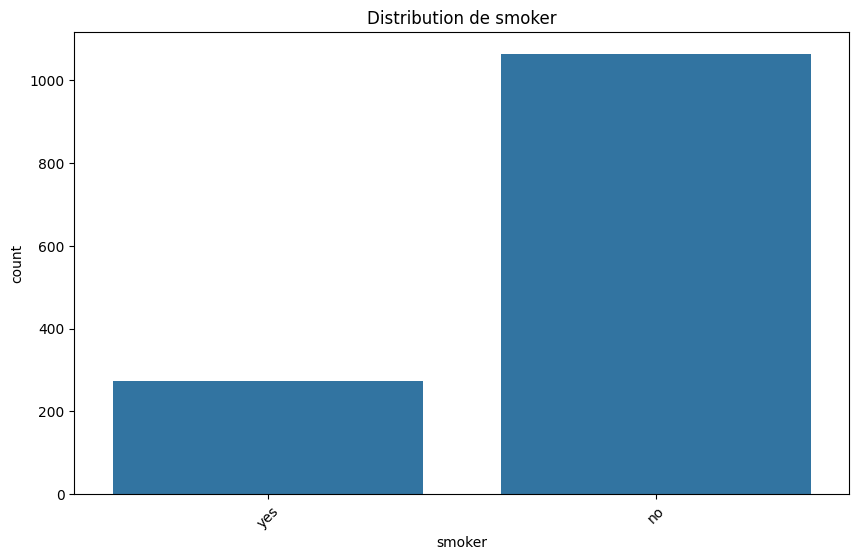

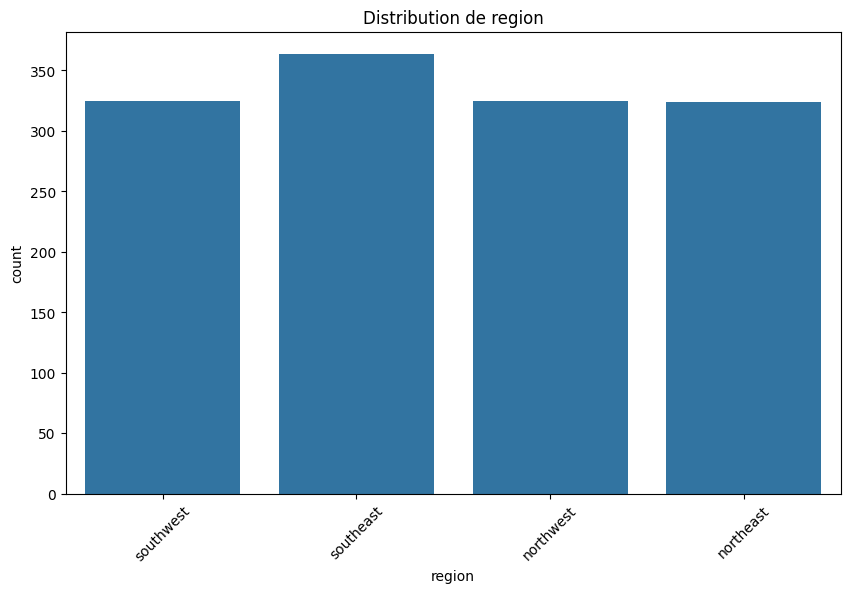

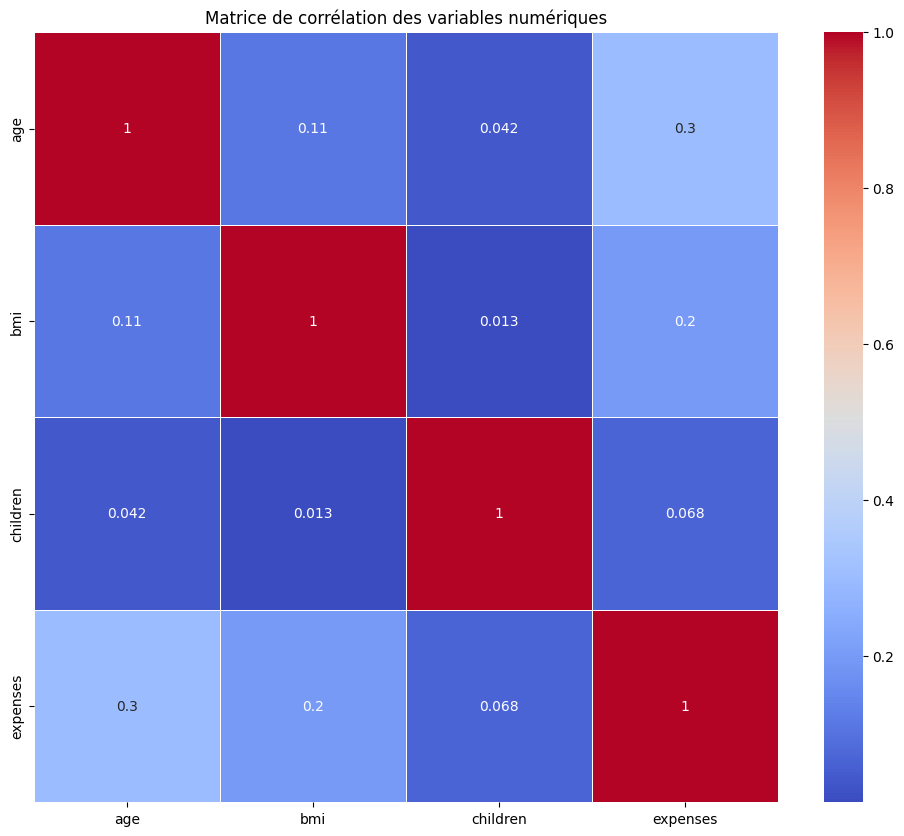

In [89]:
# Définitions des fonctions utiles
def distributions_hist(df):
    df.hist(bins=50, figsize=(20,15))
    plt.title('Distributions')
    plt.show()

def columns_separation(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns
    return numeric_columns, categorical_columns

def numerical_violins(numeric_columns):
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.violinplot(y=column, data=df)
        plt.title(f'Violin Plot de {column}')
        plt.show()

def categorical_countplots(categorical_columns):
    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=df)
        plt.title(f'Distribution de {column}')
        plt.xticks(rotation=45)
        plt.show()

def numerical_correlation_matrix(df, numeric_columns=None):
    plt.figure(figsize=(12, 10))
    if numeric_columns is None:
        numeric_columns = df.select_dtypes(include=[np.number]).columns
    sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Matrice de corrélation des variables numériques')
    plt.show()

# Définition de la target
target_column = 'expenses'
# Visualisation de la distribution des caractéristiques
distributions_hist(df)
# Séparation des colonnes
numeric_columns, categorical_columns = columns_separation(df)
# Violins pour les colonnes numériques
numerical_violins(numeric_columns)
# Countplots pour les colonnes catégoriques
categorical_countplots(categorical_columns)
# Matrice de corrélation pour les variables numériques
numerical_correlation_matrix(df, numeric_columns)


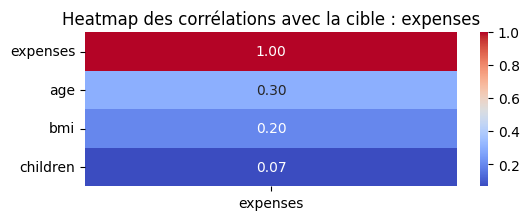

In [90]:
# visualiser les relations entre la cible et certaines caractéristiques
def target_correlation_matrix(df, target_column):
    # Sélection des colonnes numériques
    numeric_cols = df.select_dtypes(include=[np.number])

    # Calcul de la matrice de correlation
    correlation_matrix = numeric_cols.corr()

    # Correlation avec la cible
    correlation_with_target = correlation_matrix[target_column].sort_values(ascending=False)

    # Affichage
    plt.figure(figsize=(6, len(correlation_with_target) * 0.5))
    sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title(f'Heatmap des corrélations avec la cible : {target_column}')
    plt.show()

target_correlation_matrix(df, target_column)

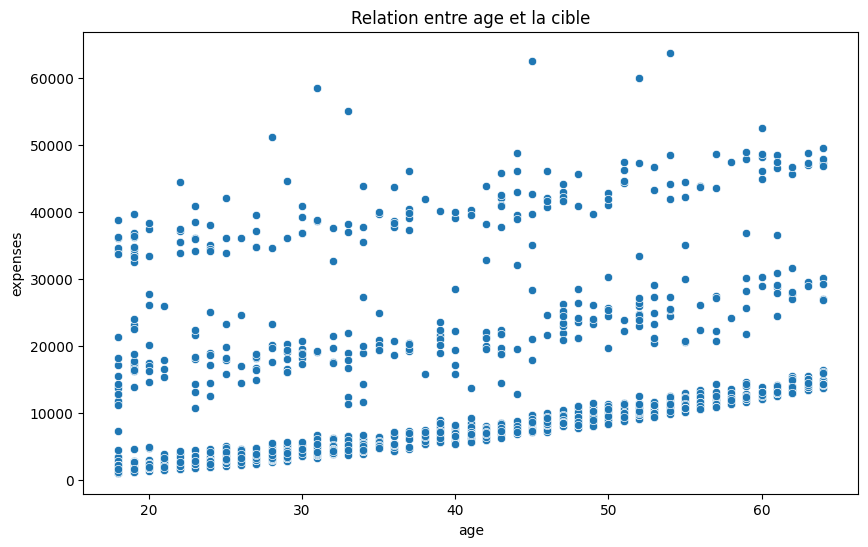

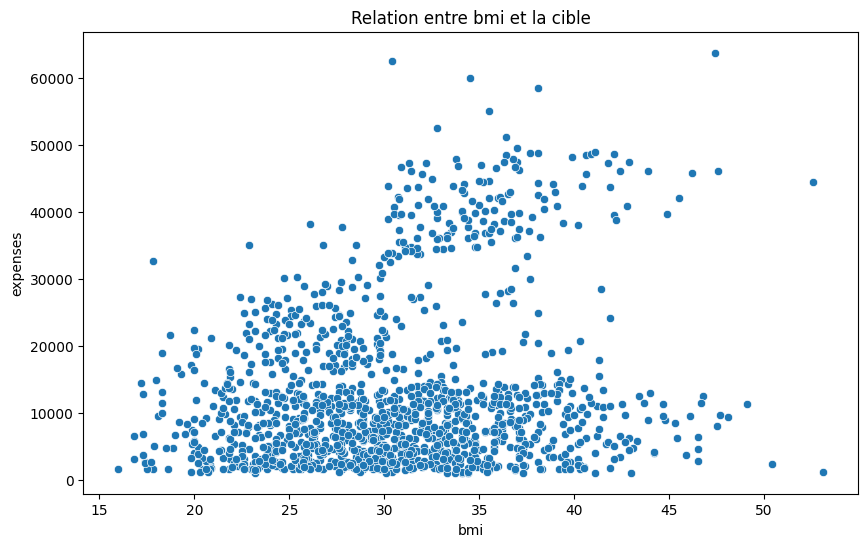

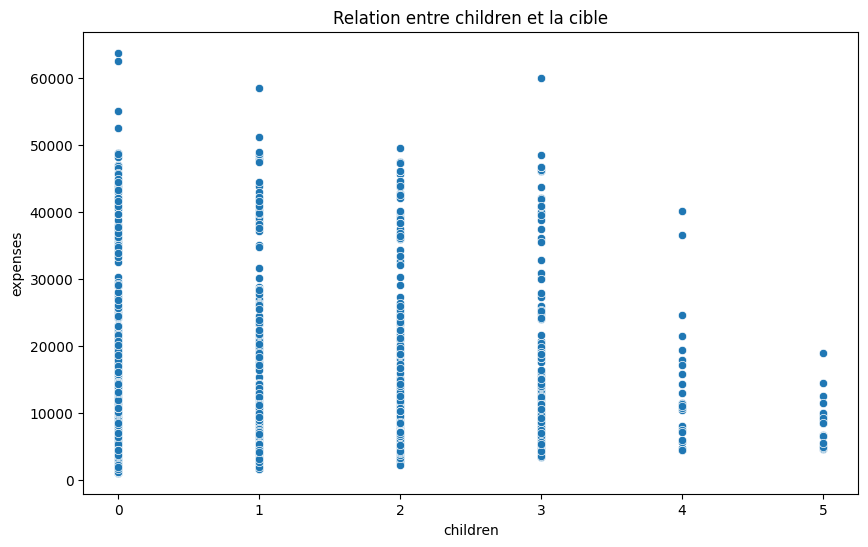

In [91]:
# Relations entre la cible et les variables numériques
def target_numerical_scatterplots(df, numeric_columns, target_column):
    # Exclude the target column
    numeric_columns = [col for col in numeric_columns if col != target_column]
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=column, y=target_column, data=df)
        plt.title(f'Relation entre {column} et la cible')
        plt.show()

target_numerical_scatterplots(df, numeric_columns, target_column)

Traitement des données

In [92]:
# Fonction pour encoder les colonnes binaires en 0 et 1
def encode_binary_columns(df, binary_columns):
    for column in binary_columns:
        # Vérification que la colonne est présente dans le DataFrame
        if column not in df.columns:
            print(f"⚠️ La colonne '{column}' est absente du DataFrame.")
            continue

        # Encodage en 0 et 1
        df[column] = df[column].astype('category').cat.codes

        # Vérification des résultats encodés
        print(f"\nColonne '{column}' après encodage :")
        print(df[column].value_counts())
    return df

# Fonction pour encoder les colonnes non binaires
def encode_non_binary_columns(df, non_binary_columns):
    le = LabelEncoder()  # Initialiser un encodeur
    for column in non_binary_columns:
        # Vérification que la colonne est présente dans le DataFrame
        if column not in df.columns:
            print(f"⚠️ La colonne '{column}' est absente du DataFrame.")
            continue

        # Appliquer le LabelEncoder à chaque colonne non binaire
        df[column] = le.fit_transform(df[column].astype(str))

        # Vérification des résultats encodés
        print(f"\nColonne '{column}' après encodage :")
        print(df[column].value_counts())
    return df

binary_columns = ['sex', 'smoker']
non_binary_columns = ['region']

df = encode_binary_columns(df, binary_columns)
df = encode_non_binary_columns(df, non_binary_columns)

display(df)



Colonne 'sex' après encodage :
sex
1    676
0    662
Name: count, dtype: int64

Colonne 'smoker' après encodage :
smoker
0    1064
1     274
Name: count, dtype: int64

Colonne 'region' après encodage :
region
2    364
3    325
1    325
0    324
Name: count, dtype: int64


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


Exploration des données après encodage

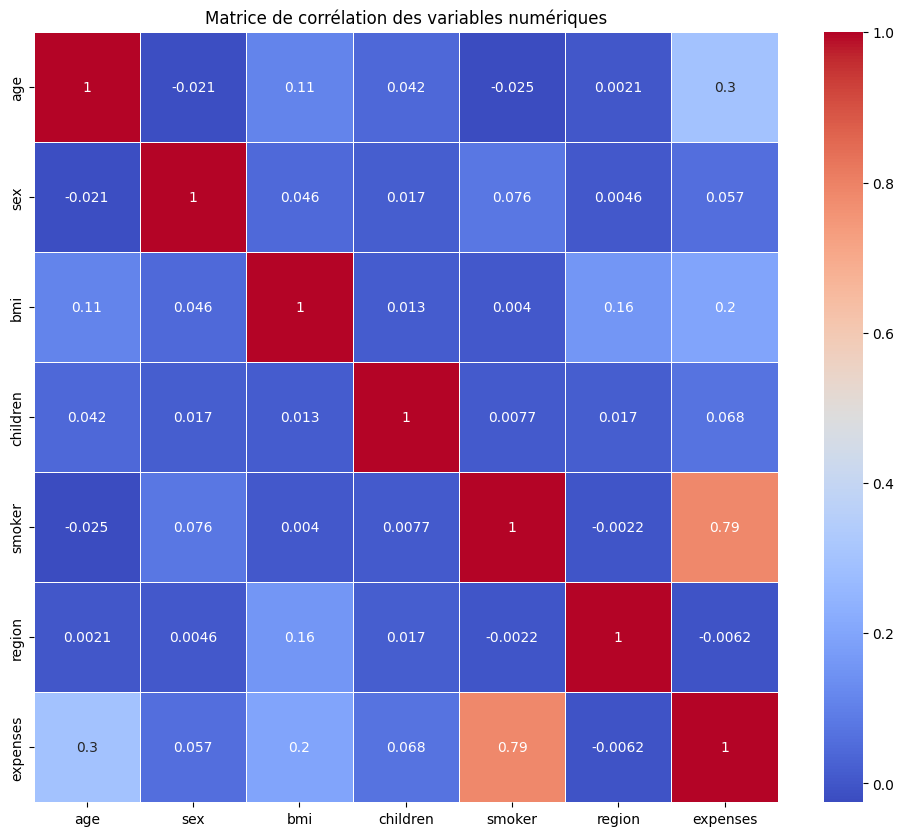

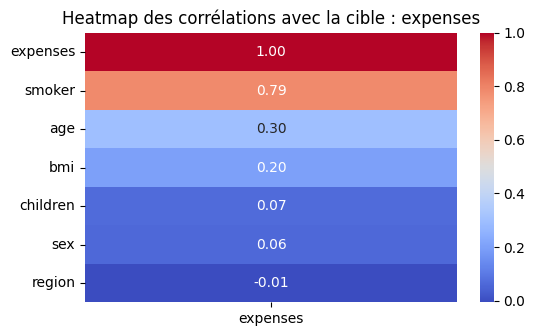

In [93]:
numerical_correlation_matrix(df)
target_correlation_matrix(df, target_column)

Séparation des caractéristiques

In [97]:
x = df.drop(target_column, axis=1)
y = df[target_column]
display(x)
print(y)


,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


Division des Données en Ensembles d’Entraînement et de Test

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(x_train)
display(x_test)
print(y_train)
print(y_test)

,age,sex,bmi,children,smoker,region
560,46,0,20.0,2,0,1
1285,47,0,24.3,0,0,0
1142,52,0,24.9,0,0,2
969,39,0,34.3,5,0,2
486,54,0,21.5,3,0,1
...,...,...,...,...,...,...
1095,18,0,31.4,4,0,0
1130,39,0,23.9,5,0,2
1294,58,1,25.2,0,0,0
860,37,0,47.6,2,1,3


,age,sex,bmi,children,smoker,region
764,45,0,25.2,2,0,0
887,36,0,30.0,0,0,1
890,64,0,26.9,0,1,1
1293,46,1,25.7,3,0,1
259,19,1,31.9,0,1,1
...,...,...,...,...,...,...
109,63,1,35.1,0,1,2
575,58,0,27.2,0,0,1
535,38,1,28.0,1,0,0
543,54,0,47.4,0,1,2


560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 1070, dtype: float64
764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
109     47055.53
575     12222.90
535      6067.13
543     63770.43
846      9872.70
Name: expenses, Length: 268, dtype: float64


Normalisation ou Standardisation des Données

In [82]:
# 1. Instancier le préprocesseur
std_scaler = StandardScaler()  # Créez une instance de la fonction de prétraitement

# 2. Ajuster et transformer les données d'entraînement
x_train_scaled = std_scaler.fit_transform(x_train)  # Apprend les paramètres et applique la transformation sur X_train

# 3. Transformer les données de test
x_test_scaled = std_scaler.transform(x_test)  # Utilise les mêmes paramètres pour transformer X_test

# 4. Afficher les données transformées
x_train_scaled
x_test_scaled

array([[ 0.40114007, -1.0246016 , -0.88770823,  0.73433626, -0.50874702,
        -1.35325561],
       [-0.23863782, -1.0246016 , -0.09306431, -0.91119211, -0.50874702,
        -0.45611589],
       [ 1.75178229, -1.0246016 , -0.60627185, -0.91119211,  1.96561348,
        -0.45611589],
       ...,
       [-0.09646495,  0.97598911, -0.42416595, -0.08842793, -0.50874702,
        -1.35325561],
       [ 1.04091797, -1.0246016 ,  2.7875199 , -0.91119211,  1.96561348,
         0.44102382],
       [ 0.82765867, -1.0246016 ,  0.60224912, -0.08842793, -0.50874702,
         1.33816354]])